In [2]:
import pandas as pd
lab_marks = pd.read_excel("E:\DSML Manipal ProLearn\Lab Internal Marks.xlsx")
lab_marks.head()

,REG NO,NAME,TOTAL
0,1,NIMA GYALPO THAPA,46.85
1,2,ROBIN SINGH,46.45
2,3,RISHABH PODDAR,43.95
3,4,ROBBIN SINGH GANDHI,47.00
4,5,NIKHIL PRADHAN,51.80


In [3]:
reg_no = lab_marks[['REG NO']]
marks = lab_marks[['TOTAL']]
#print(reg_no)
#marks

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

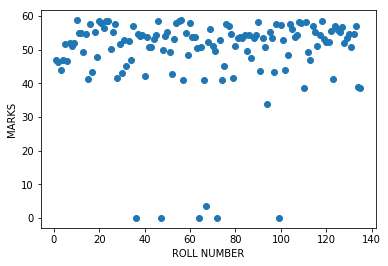

In [5]:
from matplotlib import pyplot as plt
plt.scatter(reg_no,marks)
plt.xlabel("ROLL NUMBER")
plt.ylabel("MARKS")
plt

In [ ]:
# Now using K-Means algorithm, create 5 clusters

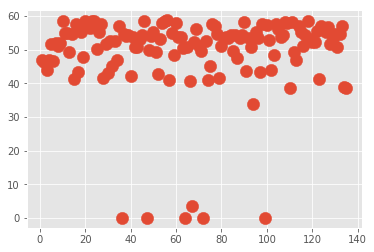

1504.4084186575653
319.4255319148936
1349.2289253539252
207.63066618825496
77.5184579137075
25.164234651934873
148.31910352187833
78.29187810991347
39.77959774257026
8.030785329233613
28.27679782903664
40.831239842463894
18.24446413417486
3.9181014730608332
28.531995175207985
27.957693367349528
12.05342440492179
1.967793362027167
26.79072276159655
17.269644425061077
10.59892666692397
2.1684620754022803
53.763328659471064
19.298932514169174
6.133361054501463
2.180922820028154
12.91038547489058
11.911150298828135
7.092315171349873
1.21348305775219
18.018772862731204
12.853153031564482
4.768310455243467
0.9428393471508741
5.810853199498111
6.312514773484591
4.665283670915794
1.4157148316838626
10.675736717711299
4.6008534990074414
3.6036964776642284
1.0197100424486734
9.871949126167486
5.344035844961942
2.631233832322884
0.9011741874942242
3.8703465982028162
5.131839066515049
0.4467619992514795
1.3234069513633073
4.104511922735808
3.1679116403178353
2.756994283076636
0.31858364664395233
4

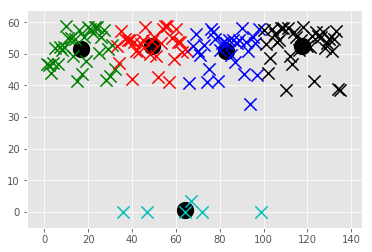

In [6]:
from matplotlib import style
style.use('ggplot')
import numpy as np

lab_marks = lab_marks[['REG NO', 'TOTAL']]
X = lab_marks.values #returns a numpy array

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = 10*["g","r","c","b","k"]


class K_Means:
    def __init__(self, k=5, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break
             
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
clf = K_Means(5)
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

In [25]:
labels = clf.predict(40)
print(labels)

1


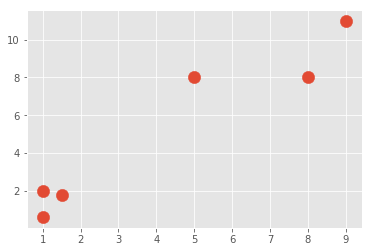

59.166666666666664
19.999999999999996


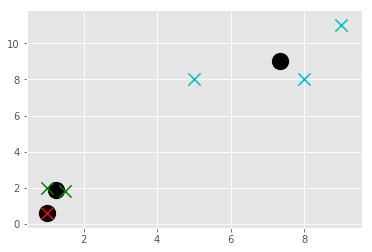

In [21]:
# This is another example of K-Means algorithm

from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = 10*["g","r","c","b","k"]


class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break
             
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
clf = K_Means(3)
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

In [ ]:
# Association Rule Mining - Example

In [5]:
pip install MLXtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [10]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()

te_ary = te.fit(dataset).transform(dataset)

df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# print(frequent_itemsets)

In [8]:
te.columns_

['Apple',
 'Corn',
 'Dill',
 'Eggs',
 'Ice cream',
 'Kidney Beans',
 'Milk',
 'Nutmeg',
 'Onion',
 'Unicorn',
 'Yogurt']

In [11]:
te_ary

array([[False, False, False,  True, False,  True,  True,  True,  True,
        False,  True],
       [False, False,  True,  True, False,  True, False,  True,  True,
        False,  True],
       [ True, False, False,  True, False,  True,  True, False, False,
        False, False],
       [False,  True, False, False, False,  True,  True, False, False,
         True,  True],
       [False,  True, False,  True,  True,  True, False, False,  True,
        False, False]])

In [9]:
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [12]:
print(frequent_itemsets)

     support                                           itemsets
0        0.2                                            (Apple)
1        0.4                                             (Corn)
2        0.2                                             (Dill)
3        0.8                                             (Eggs)
4        0.2                                        (Ice cream)
5        1.0                                     (Kidney Beans)
6        0.6                                             (Milk)
7        0.4                                           (Nutmeg)
8        0.6                                            (Onion)
9        0.2                                          (Unicorn)
10       0.6                                           (Yogurt)
11       0.2                                      (Eggs, Apple)
12       0.2                              (Kidney Beans, Apple)
13       0.2                                      (Milk, Apple)
14       0.2                            

In [13]:
frequent_itemsets = apriori(df, min_support=0.1, min_confidence=0.2, min_lift=3, use_colnames=True)
print(frequent_itemsets)

TypeError: apriori() got an unexpected keyword argument 'min_confidence'

In [ ]:
# pip install apyori
# from apyori import apriori
# Error will be debug